# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [2]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [4]:
# .columns会返回df的所有列名
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [5]:
# 与.head()不同，.sample(10)是在df中随机抽取10行
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2004,38029,North Dakota,Emmons,3463,1738,1725,0.1,96.8,0.0,0.3,...,11.0,2.1,18.1,16.5,1583,58.2,17.8,22.8,1.2,3.6
2839,51037,Virginia,Charlotte,12313,6129,6184,0.7,66.8,31.2,0.1,...,2.4,5.4,4.0,31.5,5266,72.2,22.8,5.0,0.0,4.9
2415,46107,South Dakota,Potter,2307,1098,1209,0.9,92.7,0.0,3.3,...,4.7,0.6,9.0,14.1,1142,72.4,12.5,14.9,0.2,0.5
481,13191,Georgia,McIntosh,14007,6828,7179,1.7,61.3,34.8,0.3,...,1.2,0.0,6.0,25.7,5410,73.2,20.9,6.0,0.0,8.8
1637,30079,Montana,Prairie,1372,733,639,0.8,96.1,0.0,1.1,...,7.2,1.1,20.0,13.8,543,46.4,23.6,27.4,2.6,8.1
1582,29201,Missouri,Scott,39061,19062,19999,2.1,84.1,11.3,0.3,...,0.7,0.7,4.1,18.6,17280,81.1,12.0,6.7,0.2,6.8
3176,72067,Puerto Rico,Hormigueros,16845,7824,9021,99.5,0.2,0.1,0.0,...,2.1,0.1,1.3,21.6,4887,64.2,27.2,8.6,0.0,22.6
2510,47165,Tennessee,Sumner,169623,82811,86812,4.2,85.9,6.9,0.3,...,0.9,0.8,4.6,27.7,82224,79.1,12.9,7.8,0.2,6.0
2809,50007,Vermont,Chittenden,159711,77980,81731,2.1,90.0,2.3,0.2,...,7.4,2.6,5.9,20.6,89268,79.4,14.4,6.0,0.1,5.0
2408,46095,South Dakota,Mellette,2086,1042,1044,4.5,39.4,0.0,53.3,...,11.1,0.0,24.3,18.3,740,37.3,39.9,22.4,0.4,12.0


- We will focus first on income per capita across counties.

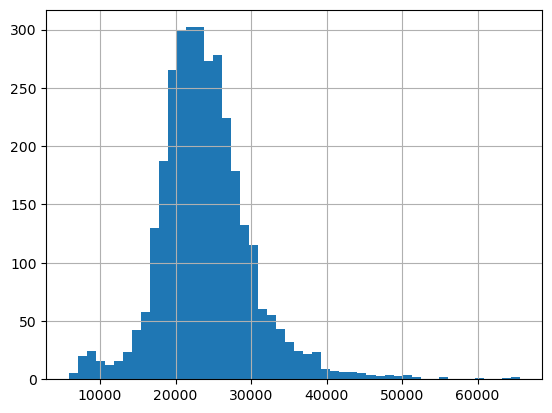

In [8]:
df['IncomePerCap'].hist(bins = 50)
plt.show()

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [9]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

count	该列的非空值（有效数据点）的数量。

mean	该列的均值（平均值）。

std	    该列的标准差，表示数据的离散程度。

min	    该列的最小值。

25%	    第 25 个百分位数（下四分位数，Q1），表示 25% 的数据小于这个值。

50%	    第 50 个百分位数（中位数，Q2），表示一半数据小于这个值。

75%	    第 75 个百分位数（上四分位数，Q3），表示 75% 的数据小于这个值。

max	    该列的最大值。

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [10]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

D 值 = 0.0638：样本与正态分布之间的最大偏差为 0.0638，但这个值本身并不说明显著性，需要结合 P 值判断。

P 值 = 0.001：P 值远小于常见显著性水平（如 0.05），说明这种偏差显著。因此，可以拒绝原假设 “样本数据符合正态分布”。

结论：你的数据 df['IncomePerCap'] 不服从正态分布。

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [11]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

p<0.5说明数据也不符合指数分布

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [15]:
#make 10 samples with replacement
# replace= True 说明是有放回的进行十次抽样，其中部分行可能会重复，因为抽样时允许放回
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
# replace= False 说明是无放回的进行十次抽样
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population

# 有时我们希望让某些数据点比其他数据点更容易被抽中。在此，根据人口总数 TotalPop 的大小调整抽样概率。
# 如果某一行的 TotalPop 值较大，该行被选中的概率就会更高。如果某一行的 TotalPop 值较小，该行被选中的概率就会更低。
# 对少数类数据进行上采样（upsampling）（增加样本量）。对多数类数据进行下采样（downsampling）（减少样本量）。

sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [16]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

158751.8
747212.3


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [17]:
# 这段代码使用 Scipy 的 stats.pearsonr 方法，计算两列数据之间的 皮尔逊相关系数（Pearson Correlation Coefficient），以及对应的 P 值。
# 它的目的是测量 IncomePerCap（人均收入） 和 Employed（就业人数） 之间的线性关系。

stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394482, pvalue=9.942215354247144e-53)

statistic=0.2646：皮尔逊相关系数r, 表示两个变量之间的线性相关程度。r=0.2646 表明这两个变量之间存在正相关，但相关性较弱（r接近 0 时相关性较弱，接近 1 或 -1 时相关性较强）。

pvalue=9.942215354247144e-53：P 值是用来检验相关性的显著性。这个值非常接近 0，表示相关性极为显著,可以拒绝原假设(H0: r=0),即两个变量之间的相关性不是偶然的。

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [18]:
# 这段代码使用 Scipy 的 stats.spearmanr 方法，计算两列数据之间的斯皮尔曼相关系数（Spearman Correlation Coefficient），以及对应的 P 值。
# 斯皮尔曼相关系数主要用来衡量两个变量的排序相关性，它更关注数据之间的单调关系（monotonic relationship），而不仅仅是线性关系。

stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

statistic = 0.3077：表示斯皮尔曼相关系数ρ的值。ρ=0.3077 表示两个变量之间存在正单调关系，但相关性较弱。ρ 的值越接近 1 或 -1，相关性越强；越接近 0，相关性越弱。

单调关系的意思是：当一个变量增加时，另一个变量通常也会增加（正相关），但这种关系不一定是线性的。

pvalue = 1.4153e-71：表示相关系数的 P 值，用于检验相关性的显著性。这个值非常接近 0，表示相关性极为显著。这两个变量之间的正相关关系是显著的。

总体结论：虽然变量之间的单调相关性较弱，但这种关系具有统计学意义，可以认为变量之间确实存在某种正相关关系。

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [19]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

.loc 和 .iloc 的区别
.loc 和 .iloc 是 Pandas 中用于选择 DataFrame 数据的两种方法，它们的主要区别在于 索引方式 不同：

.loc	按标签（label）索引	使用行索引名或列名
.iloc	按位置（integer position）索引	使用行号和列号的整数索引

In [20]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

双边检验（two-sided test）：

目的：检验两个样本的均值是否有显著差异，无论差异是正的还是负的。
具体来说，统计上计算两个样本的均值差异的 t 值和对应的 P 值：t 值反映样本均值之间的差异程度。P 值表示观察到这种差异的概率。如果 P 值小于某个阈值（例如 0.05），说明差异显著。

单边检验：如果我们只关心一个方向的差异（例如样本 A 是否显著大于样本 B），可以选择单边检验。

In [22]:
# t-test自动会将两边的数据取均值进行差值比较
stats.ttest_ind(
    df.loc[df['State'] == 'New York']['IncomePerCap'], 
    df.loc[df['State'] == 'California']['IncomePerCap']
)

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

statistic=0.198代表t值，衡量两个样本均值之间差异的大小。由于接近0，表明两个样本的均值差异非常小。

pvalue=0.843代表p值，用于检验均值差异的统计显著性，远大于常见的显著性水平（如 0.05），这意味着不能拒绝原假设H0（"New York" 和 "California" 的人均收入均值相等），即两个样本的均值没有显著差异。

df = 118.0代表自由度，决定了 t 分布的形状。自由度计算公式为df=n1+n2-2，这意味着两个样本的总大小是 n1+n2=120.

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

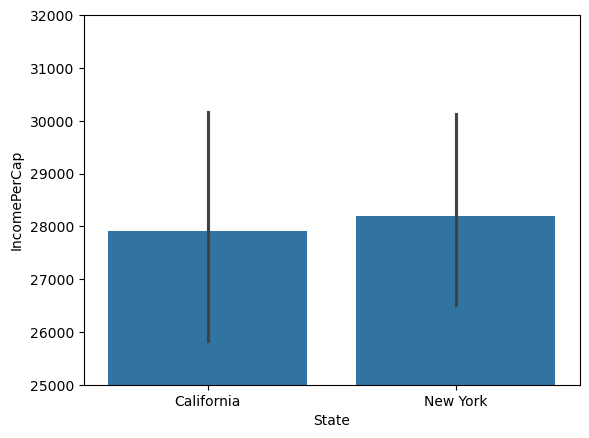

In [25]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])
plt.show()

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [27]:
### your code and or answer here ###
# 利用散点图，横轴是每个state的self-employed比例，纵轴是人均收入，每个点代表不同的state

per_capita_self_empl=df[['State','IncomePerCap','SelfEmployed']]
per_capita_self_empl.head()

,State,IncomePerCap,SelfEmployed
0,Alabama,24974,5.5
1,Alabama,27317,5.8
2,Alabama,16824,7.3
3,Alabama,18431,6.7
4,Alabama,20532,4.2


双层中括号是 Pandas 中用于提取多个列的方法，返回的结果是一个 DataFrame。

如果只用单层中括号，Pandas 会认为你要提取单列（即 Series），而这里你需要的是多列，因此必须使用双层中括号。

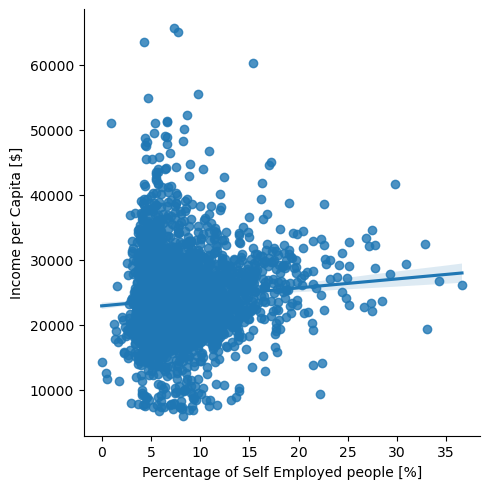

In [29]:
sns.lmplot(per_capita_self_empl,x='SelfEmployed',y='IncomePerCap')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.show()

In [30]:
stats.pearsonr(per_capita_self_empl['SelfEmployed'],per_capita_self_empl['IncomePerCap'])

PearsonRResult(statistic=0.08727386609551727, pvalue=7.052861196525885e-07)

存在显著的很小的正相关性。虽然相关性在统计上显著，但它在实际中几乎没有意义。换句话说，自雇比例对人均收入的影响可能非常有限。

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [32]:
### your code and or answer here ###
SetA_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['Wisconsin', 'Tennessee', 'Minnesota'])]
SetA_per_capita_self_empl.head()

,State,IncomePerCap,SelfEmployed
1314,Minnesota,25591,9.2
1315,Minnesota,31775,4.2
1316,Minnesota,26399,9.0
1317,Minnesota,22524,6.2
1318,Minnesota,25341,5.7


solution中的query 方法：

SetA_per_capita_self_empl = per_capita_self_empl.query("State == 'Wisconsin' | \
                                                        State == 'Tennessee' | \
                                                        State == 'Minnesota' ") 

接受一个字符串作为筛选条件，字符串中可以包含 Pandas 列名和逻辑表达式（如 ==, | 等）。将字符串转化为布尔条件，用于筛选数据。State == '...' | State == '...'.用逻辑表达式明确列名 State 的值应该等于某些特定值。


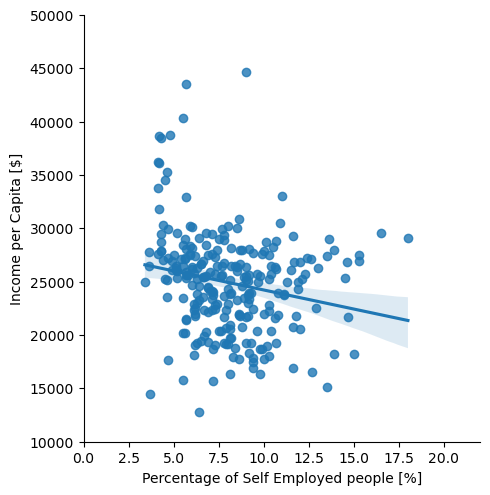

In [33]:
sns.lmplot(SetA_per_capita_self_empl,x='SelfEmployed',y='IncomePerCap')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])
plt.show()

In [34]:
stats.pearsonr(SetA_per_capita_self_empl['SelfEmployed'],SetA_per_capita_self_empl['IncomePerCap'])

PearsonRResult(statistic=-0.20229350736521495, pvalue=0.0011881639322138644)

r值的结果：自雇比例较高的县，人均收入倾向于略低（线性关系较弱，但方向是负的）

p值远小于0.05，表明 SelfEmployed 和 IncomePerCap 的相关性具有统计显著性

结论：负相关关系显著，但相关性很弱，说明自雇比例对人均收入的直接线性影响较小。

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

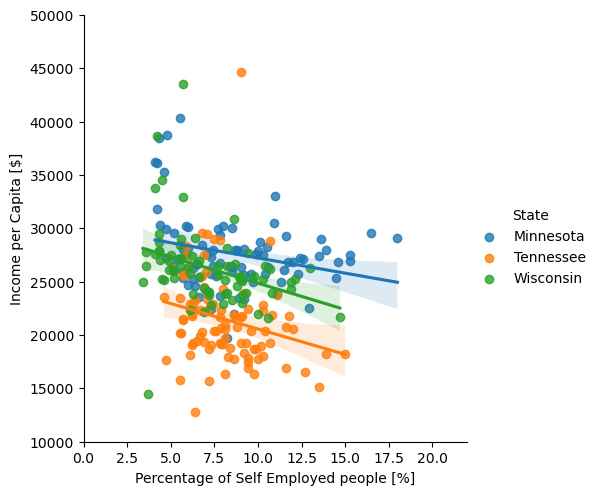

In [35]:
### your code and or answer here ###
# 可以通过hue对数据进行分组
sns.lmplot(SetA_per_capita_self_empl,x='SelfEmployed',y='IncomePerCap',hue='State')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])
plt.show()

In [38]:
Wisconsin_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['Wisconsin'])]
Tennessee_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['Tennessee'])]
Minnesota_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['Minnesota'])]

print("Wisconsin: {}".format(stats.pearsonr(Wisconsin_per_capita_self_empl['SelfEmployed'],Wisconsin_per_capita_self_empl['IncomePerCap'])))
print("Tennessee: {}".format(stats.pearsonr(Tennessee_per_capita_self_empl['SelfEmployed'],Tennessee_per_capita_self_empl['IncomePerCap'])))
print("Minnesota: {}".format(stats.pearsonr(Minnesota_per_capita_self_empl['SelfEmployed'],Minnesota_per_capita_self_empl['IncomePerCap'])))

Wisconsin: PearsonRResult(statistic=-0.32905300016378525, pvalue=0.004768134887745218)
Tennessee: PearsonRResult(statistic=-0.2383604868491315, pvalue=0.020011631955528172)
Minnesota: PearsonRResult(statistic=-0.2538551921654062, pvalue=0.01766519930091188)


所以威斯康辛是被影响最大的，因为r的绝对值最大，并且p结果是显著的。

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

In [39]:
### your code and or answer here ###
SetB_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['New Jersey', 'Kansas', 'Rhode Island'])]
SetB_per_capita_self_empl.head()

,State,IncomePerCap,SelfEmployed
888,Kansas,20671,9.1
889,Kansas,21226,18.7
890,Kansas,21677,6.0
891,Kansas,28174,12.0
892,Kansas,24338,7.7


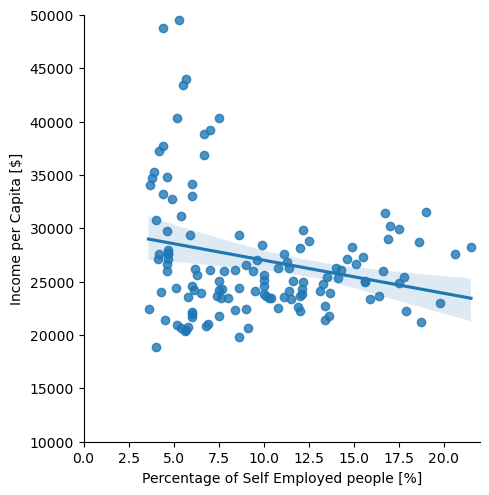

In [40]:
sns.lmplot(SetB_per_capita_self_empl,x='SelfEmployed',y='IncomePerCap')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])
plt.show()

In [41]:
stats.pearsonr(SetB_per_capita_self_empl['SelfEmployed'],SetB_per_capita_self_empl['IncomePerCap'])

PearsonRResult(statistic=-0.23222141346085692, pvalue=0.0076074930428573165)

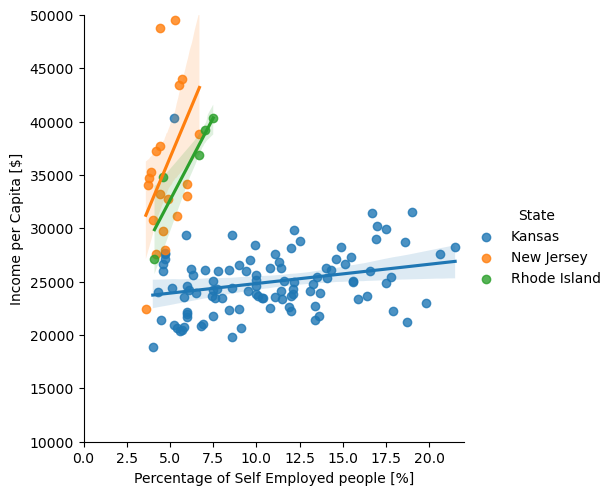

In [42]:
sns.lmplot(SetB_per_capita_self_empl,x='SelfEmployed',y='IncomePerCap',hue='State')
plt.xlabel("Percentage of Self Employed people [%]")
plt.ylabel("Income per Capita [$]")
plt.ylim([10000,50000])
plt.xlim([0,22])
plt.show()

In [43]:
New_Jersey_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['New Jersey'])]
Kansas_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['Kansas'])]
Rhode_Island_per_capita_self_empl = per_capita_self_empl.loc[per_capita_self_empl['State'].isin(['Rhode Island'])]

print("New Jersey: {}".format(stats.pearsonr(New_Jersey_per_capita_self_empl['SelfEmployed'],New_Jersey_per_capita_self_empl['IncomePerCap'])))
print("Kansas: {}".format(stats.pearsonr(Kansas_per_capita_self_empl['SelfEmployed'],Kansas_per_capita_self_empl['IncomePerCap'])))
print("Rhode Island: {}".format(stats.pearsonr(Rhode_Island_per_capita_self_empl['SelfEmployed'],Rhode_Island_per_capita_self_empl['IncomePerCap'])))

New Jersey: PearsonRResult(statistic=0.4804478471336282, pvalue=0.027488944757806215)
Kansas: PearsonRResult(statistic=0.25810299714436924, pvalue=0.007853351846832413)
Rhode Island: PearsonRResult(statistic=0.9021788382149805, pvalue=0.036183102015759167)


在SetA和SetB中，鼓励自主创业的话首先排除SetA，因为都是负相关，意味着自主创业比例越高，人均收入越低。在SetB中3个State都是显著的，最正相关的是Rhode Island，r值0.9，自雇比例对人均收入的提升效果非常显著

# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

In [44]:
### your code and or answer here ###
# 7000*5%=350，选c

### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

In [45]:
### your code and or answer here ###
# 选b
# a项中的barplot：x轴为分类变量，y轴为数值变量的统计值（默认均值）

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

In [46]:
### your code and or answer here ###
# 这段代码使用了 statsmodels 中的 proportion.binom_test 函数来执行一个单边二项检验（one-sided binomial test）
# 计算 p 值并评估观察到的成功率是否显著高于假设成功率

from statsmodels.stats import proportion 
proportion.binom_test(28, 100, 0.2, alternative='larger')

0.03415162963907485

In [47]:
# 因此选c

参数解释
28：成功的次数，即样本中观察到的成功病例数。这里表示有 28 名患者报告在服用新药后有所改善。

100：总试验次数，即样本总数。这里表示共有 100 名患者参与试验。

0.2：零假设下的成功概率。假设患者报告改善的概率与服用安慰剂时（20%）相同。

alternative='larger'：设定了单边检验，检测方向为 "观察到的成功率是否显著高于假设成功率（20%）"。

可选值：'two-sided'：双边检验，检测成功率是否不同于 20%。'larger'：单边检验，检测成功率是否显著高于 20%。'smaller'：单边检验，检测成功率是否显著低于 20%。

零假设：新药的成功率（改善概率）与安慰剂的成功率相同

备择假设：新药的成功率高于安慰剂的成功率

### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

In [48]:
### your code and or answer here ###
# 10000 * 2.5% = 250，10000 * 97.5% = 9750
# 选c

Bootstrap 重采样 是一种非参数统计方法，用于估计数据分布的不确定性和统计量（如均值、方差等）的置信区间。通过从原始样本中有放回地抽样生成新的样本，重复多次，计算每次的均值，从而生成均值的分布，进而推导置信区间。

目标：计算 1,000 人身高的 95% 置信区间。置信区间的下限和上限是样本均值分布中分别位于 2.5% 和 97.5% 的位置。

### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

In [49]:
### your code and or answer here ###
# 选a

Simpson's Paradox 辛普森悖论：在分组数据中，每个子组的趋势与整体数据的趋势相反。这种现象通常在数据的加权组合或汇总时发生，可能会掩盖子组中的关系。

举例说明：假设有两个系（A 和 B）的数据如下：

系别	GPA	初级薪资	样本量

A	正相关	正相关	100

B	正相关	正相关	900

假设在整体数据中，系别 A 的学生普遍薪资较高，而系别 B 的学生普遍薪资较低。那么，当将两个系的数据合并时，如果系别 B 的数据占主导（权重大），整体数据可能呈现出负相关（即高 GPA 的学生倾向于来自薪资较低的系别 B）。

核心点：即使每个系内部的 Spearman 相关性都是正的（高 GPA = 高薪资），整体合并后可能表现为负相关。这就是 Simpson's Paradox。

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

In [50]:
### your code and or answer here ###
# 这意味着有一页或者几页访问量特别特别高
# 重尾分布像反比例函数

# 左偏分布是不对称的正态分布
# 众数就是数据最集中的那个点，也就是density的最高点；
# 中位数把density曲线下方的面积平均分为两半；左偏是左边的尾巴长，有极小值拉低了平均值；而右偏则是右边的尾巴长，有极大值拉高了平均值。
# Mean<Median<Mode: 左偏
# Mode<Median<Mean: 右偏

# 选d，没有一个正确。可能只是存在一个outlier。